In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score

from scipy.cluster.hierarchy import linkage, dendrogram

np.set_printoptions(suppress=True, precision=5)


%matplotlib inline

In [2]:
X, y = make_blobs(n_samples = 150, n_features=2, 
                  centers=3, cluster_std=0.5, shuffle=True, random_state=0)

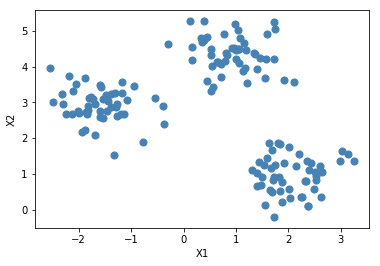

In [3]:
plt.scatter(X[:, 0], X[:, 1], c = "steelblue", marker = "o", s = 50)
plt.xlabel("X1")
plt.ylabel("X2")

In [4]:
km = KMeans(n_clusters=3, init="random", n_init = 10, 
            max_iter = 300, tol = 1e-04, random_state=0)
y_km = km.fit_predict(X)

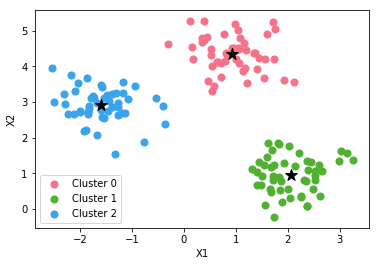

In [5]:
def show_cluster(X, y, estimator = None, ignore_noise = True):
    levels = set(y)
    
    if ignore_noise and -1 in levels:
        levels.remove(-1)
    
    colors = sns.color_palette("husl", len(levels))
    centroids = None 
    if estimator is not None and hasattr(estimator, "cluster_centers_"):
        centroids = estimator.cluster_centers_  

    for k in levels:
        data = X[y == k, :]
        plt.scatter(data[:, 0], data[:, 1], color = colors[k], s = 50, label = "Cluster %s" % k)

    if not centroids is None:
        plt.scatter(centroids[:, 0], centroids[:, 1], color = "black", marker = "*", s = 150)

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend(loc = "lower left")
    
show_cluster(X, y_km, km)

In [6]:
km.cluster_centers_

array([[ 0.93297,  4.35421],
       [ 2.06522,  0.96137],
       [-1.59473,  2.92237]])

In [7]:
#Sum of distances of samples to their closest cluster center.
print("Distortion (Within Cluster SSE): %.2f" % km.inertia_)

Distortion (Within Cluster SSE): 72.48


In [8]:
#Sum of distances of samples to their closest cluster center.
homogeneity_score(y, y_km)

1.0

Homogeneity score:  0.681219069709 Inertia:  262.720465653


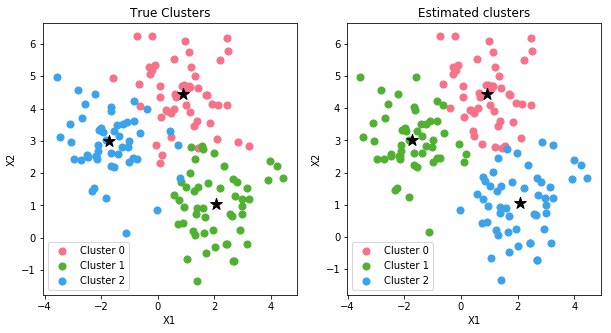

In [9]:
X, y = make_blobs(n_samples = 150, n_features=2, centers=3, 
                  cluster_std=1.0, shuffle=True, random_state=0)
km = KMeans(n_clusters=3, init="random", n_init = 10, 
            max_iter = 300, tol = 1e-04, random_state=0)
y_km = km.fit_predict(X)
print("Homogeneity score: ", homogeneity_score(y, y_km), "Inertia: ", km.inertia_)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_cluster(X, y, km)
plt.title("True Clusters")
plt.subplot(1, 2, 2)
show_cluster(X, y_km, km)
plt.title("Estimated clusters")

# Find optimal number of clusters using elbow method

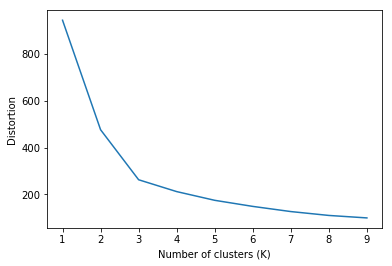

In [10]:
def find_elbow(X, n = 10):
    distortions = []
    for i in range(1, n):
        km = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0, init="k-means++")
        km.fit(X)
        distortions.append(km.inertia_)
    plt.plot(range(1, n), distortions)
    plt.xlabel("Number of clusters (K)")
    plt.ylabel("Distortion")

find_elbow(X)

## Find number of clusters from Dendogram

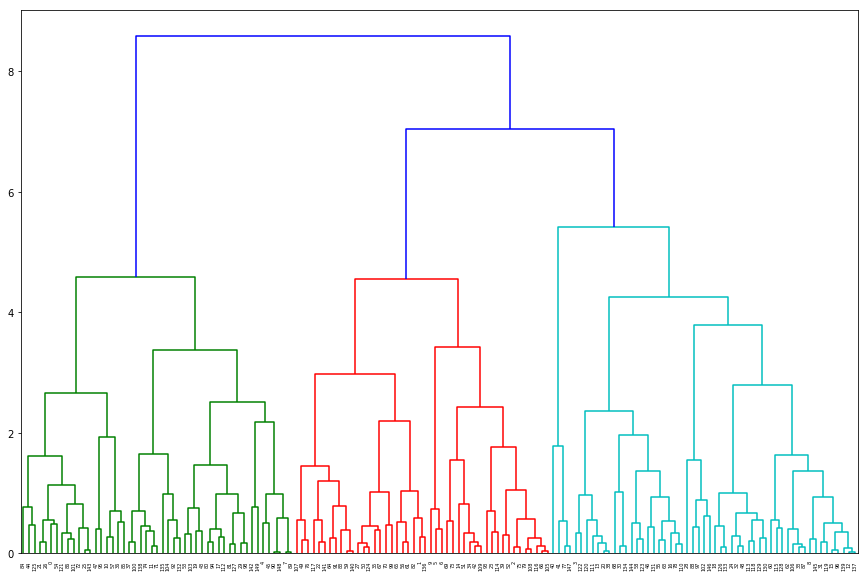

In [11]:
plt.figure(figsize = (15, 10))
row_clusters = linkage(X, method="complete", metric="euclidean")
f = dendrogram(row_clusters)

# Half Moon Dataset and DBSCAN

In [12]:
from sklearn.datasets import make_moons

In [13]:
X, y = make_moons(n_samples=200, noise=0.09, random_state=0)

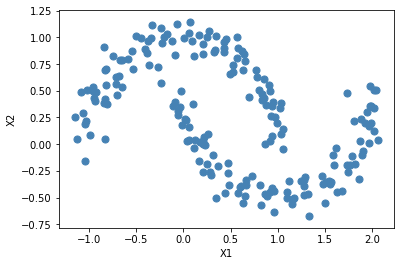

In [14]:
plt.scatter(X[:, 0], X[:, 1], c = "steelblue", marker = "o", s = 50)
plt.xlabel("X1")
plt.ylabel("X2")

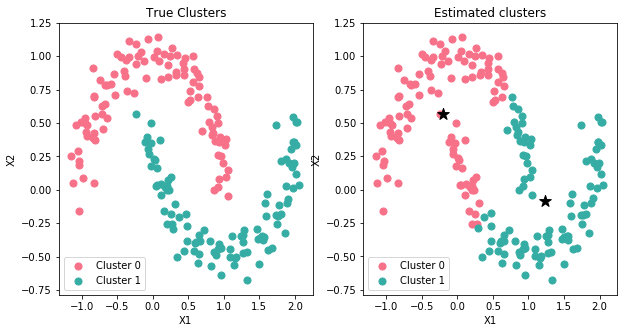

In [15]:
km = KMeans(n_clusters=2, init="random", n_init = 10, max_iter = 300, tol = 1e-04, random_state=0)
y_km = km.fit_predict(X)
#show_cluster(km, X, y_km)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_cluster(X, y)
plt.title("True Clusters")
plt.subplot(1, 2, 2)
show_cluster(X, y_km, km)
plt.title("Estimated clusters")

In [16]:
homogeneity_score(y, y_km)

0.18109823201826031

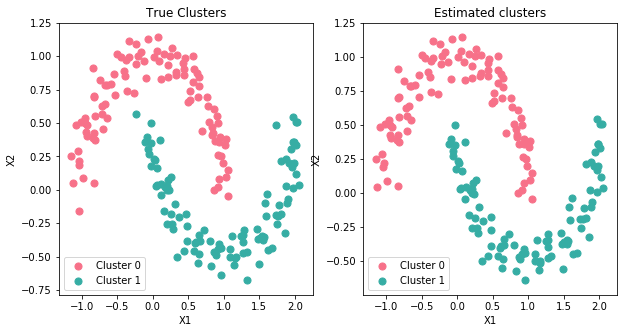

In [17]:
dbscan = DBSCAN(eps=0.2, min_samples=5, metric="euclidean")
y_db = dbscan.fit_predict(X)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_cluster(X, y, dbscan)
plt.title("True Clusters")
plt.subplot(1, 2, 2)
show_cluster(X, y_db, dbscan)
plt.title("Estimated clusters")

In [18]:
labels = set(y_db)
if -1 in labels: #Noise
    labels.remove(-1)
print("No of clusters: ", len(labels))

No of clusters:  2


In [19]:
homogeneity_score(y, y_db)

0.98377443751081795

# Applying clustering to grouplens movies dataset based on genre

In [20]:
movies = pd.read_csv("data/ml-latest-small/movies.csv", index_col="movieId")
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [21]:
movies.sample(10)

,title,genres
movieId,,
90376,We Need to Talk About Kevin (2011),Drama|Thriller
1756,"Prophecy II, The (1998)",Horror
27646,Soldier's Girl (2003),Drama
3571,Time Code (2000),Comedy|Drama
149354,Sisters (2015),Children|Comedy
7369,Scooby-Doo 2: Monsters Unleashed (2004),Action|Adventure|Children|Comedy|Mystery
25792,"I Was Born, But... (a.k.a. Children of Tokyo) ...",Comedy|Drama
5041,Fire and Ice (1983),Animation|Fantasy
1897,High Art (1998),Drama|Romance


In [22]:
movies = movies[~movies["genres"].str.contains("\(no genres listed\)")]
movies.sample(10)

,title,genres
movieId,,
2095,"Shaggy D.A., The (1976)",Children|Comedy
117123,Dear White People (2014),Comedy|Drama
26394,"Turning Point, The (1977)",Drama|Romance
3574,Carnosaur 3: Primal Species (1996),Horror|Sci-Fi
1076,"Innocents, The (1961)",Drama|Horror|Thriller
5675,Swept Away (2002),Comedy|Romance
3117,Ride with the Devil (1999),Drama|Romance|War
609,Homeward Bound II: Lost in San Francisco (1996),Adventure|Children
4752,Maniac (1980),Horror


In [23]:
genres = set()
movies["genres"].apply(lambda g: genres.update(g.split(r"|")))
genres = list(genres)
genres.sort()
print(genres, len(genres))

['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'] 19


In [24]:
def to_vector(g):
    indices = np.array([genres.index(v) for v in g.split(r"|")])
    l = np.zeros(len(genres))
    l[indices] = 1
    return l

genres_idx = movies["genres"].apply(to_vector)
genres_idx.head(10)

movieId
1     [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...
2     [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
3     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
4     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...
5     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
6     [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
7     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
8     [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9     [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10    [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: genres, dtype: object

In [25]:
X = np.array(genres_idx.tolist())
print("X.shape: ", X.shape)

X.shape:  (9107, 19)


Normalize the data

In [26]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

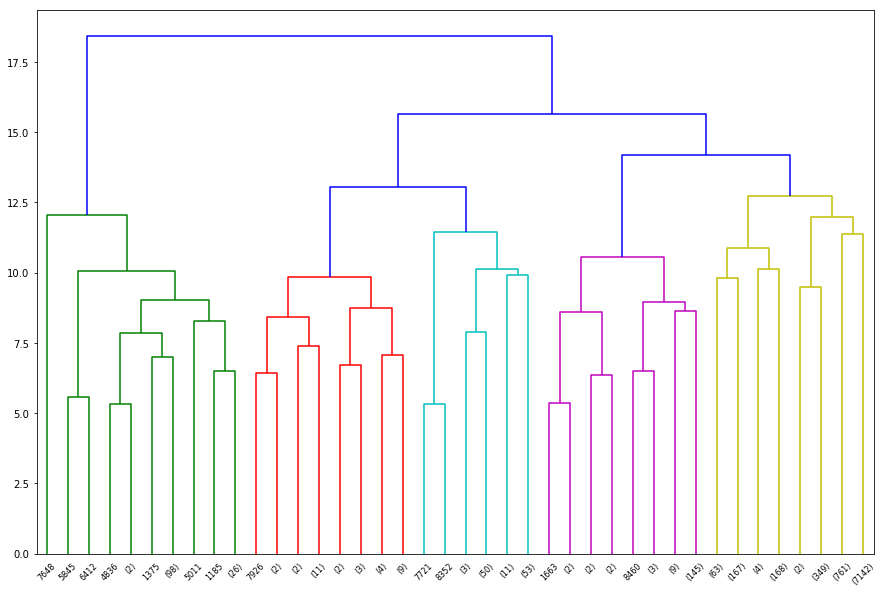

In [27]:
plt.figure(figsize = (15, 10))
row_clusters = linkage(X_std, method="complete", metric="euclidean")
f = dendrogram(row_clusters, p = 5, truncate_mode="level")

To visualize the clusters lets apply PCA with 2 components. 

In [28]:
from sklearn.decomposition import KernelPCA, PCA

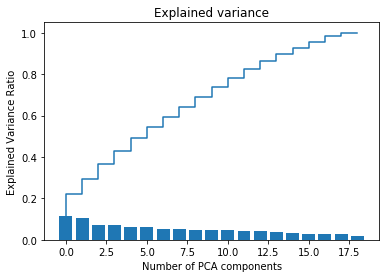

In [29]:
pca = PCA(random_state=0)
X_pca = pca.fit_transform(X_std)

ratios = pca.explained_variance_ratio_
plt.bar(range(len(ratios)), ratios)
plt.step(range(len(ratios)), np.cumsum(ratios), 
         label = "Cumsum of Explained variance ratio")
plt.title("Explained variance")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Number of PCA components")

With 2 principle components havelow explained variance coverage.

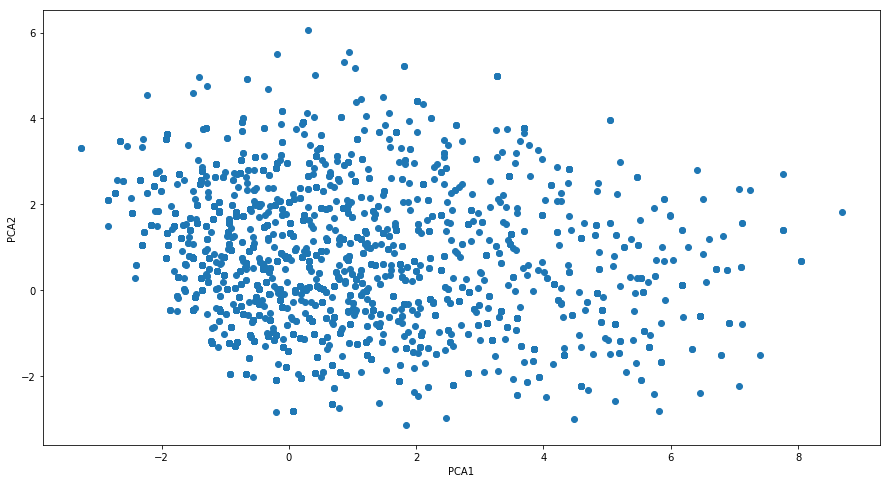

In [30]:
pca = PCA(random_state=0, n_components=2)
X_pca = pca.fit_transform(X_std)

plt.figure(figsize = (15, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PCA1")
plt.ylabel("PCA2")

There is not visual indication of clusters from 2 PCA components which is consistent with the finding that explained variance with 2 components is only 2%

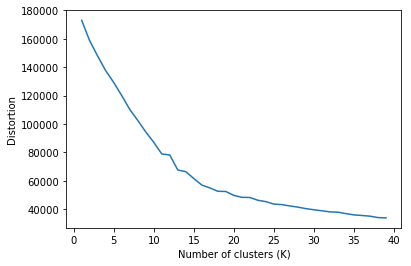

In [31]:
find_elbow(X_std, 40)

In [32]:
knn = KMeans(n_clusters=8, max_iter=300, random_state=0)
y_pred = knn.fit_predict(X_std)

For each observations, compute distance to the nearest cluster centroid. 

In [33]:
def distance(p1, p2):
    p1, p2 = p1.flatten(), p2.flatten()
    return np.sqrt(np.sum((p1 - p2) ** 2))

distances = []
for i in range(X_std.shape[0]):
    p1 = X_std[i, :]
    cluster = knn.labels_[i]
    center = knn.cluster_centers_[cluster]
    distances.append(distance(p1, center))

movies["distance"] = np.array(distances)
movies.sort_values("distance", ascending=False)[:10]

,title,genres,distance
movieId,,,
81132,Rubber (2010),Action|Adventure|Comedy|Crime|Drama|Film-Noir|...,10.008449
81847,Tangled (2010),Animation|Children|Comedy|Fantasy|Musical|Roma...,8.401892
83613,Cowboys & Aliens (2011),Action|Sci-Fi|Thriller|Western|IMAX,8.313656
595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,8.223587
2142,"American Tail: Fievel Goes West, An (1991)",Adventure|Animation|Children|Musical|Western,8.047143
103384,"Lone Ranger, The (2013)",Action|Adventure|Western|IMAX,7.930896
7374,Home on the Range (2004),Animation|Children|Comedy|Musical|Western,7.822317
364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,7.558606
3159,Fantasia 2000 (1999),Animation|Children|Musical|IMAX,7.416244


In [34]:
movies[y_pred == 3].sample(10)

,title,genres,distance
movieId,,,
101142,"Croods, The (2013)",Adventure|Animation|Comedy,4.213158
64116,Igor (2008),Animation|Comedy,4.432396
36289,Asterix & Obelix vs. Caesar (Astérix et Obélix...,Adventure|Children|Comedy|Fantasy,4.241107
104245,Planes (2013),Adventure|Animation|Comedy,4.213158
52287,Meet the Robinsons (2007),Action|Adventure|Animation|Children|Comedy|Sci-Fi,5.185785
2124,"Addams Family, The (1991)",Children|Comedy|Fantasy,4.458971
392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,4.117683
86298,Rio (2011),Adventure|Animation|Children|Comedy,3.824960
4911,Jabberwocky (1977),Adventure|Comedy|Fantasy,4.594276
